In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from skimage.color import rgb2gray

In [2]:
(y_train, _), (y_test, _) = cifar10.load_data()

Y_train = y_train[:50000]
Y_test = y_test[:10000]
Y_train = y_train.astype("float32")/255
Y_test = y_test.astype("float32")/255

print(f' Y Training Shape {y_train.shape}')
print(f' Y Test Shape {y_test.shape}')

170500096/170498071 [==============================] - 4s 0us/step
 Y Training Shape (50000, 32, 32, 3)
 Y Test Shape (10000, 32, 32, 3)


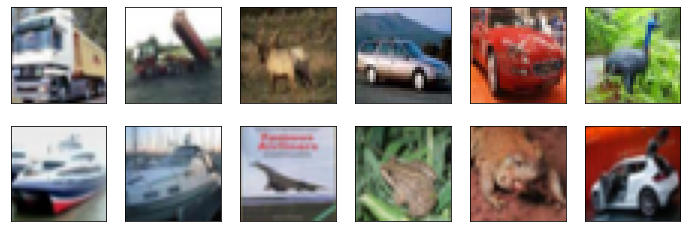

In [3]:
def plot_image(Nrow, Ncol, image_size, channel, *image_list):
    plt.figure(figsize=(2*Ncol, 2*Nrow))
    for i in range(1,Ncol+1):
        for j in range(len(image_list)):
            ax = plt.subplot(len(image_list), Ncol, i+j*Ncol)
            plt.imshow(image_list[j][i])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()
plot_image(2, 6, 32, 3, Y_train, Y_test)

In [4]:
from IPython.display import display, Image
from matplotlib.pyplot import imshow
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img
from skimage.color import lab2rgb, rgb2lab

## RGB

In [6]:
from skimage.color import rgb2gray
X_train_gray = rgb2gray(Y_train) # convert color images to gray scale
X_test_gray = rgb2gray(Y_test) # convert color images to gray scale
print(f'Train Input shape: {X_train_gray.shape}')
print(f'Test Input shape: {X_test_gray.shape}')

Train Input shape: (50000, 32, 32)
Test Input shape: (10000, 32, 32)


In [7]:
xtr_size = X_train_gray.shape
ytr_size = Y_train.shape
xts_size = X_test_gray.shape
yts_size = Y_test.shape

print(f'Train Input shape: {xtr_size}')
print(f'Trian Output shape: {ytr_size}')
print(f'Test Input shape: {xts_size}')
print(f'Test Output shape: {yts_size}')

Train Input shape: (50000, 32, 32)
Trian Output shape: (50000, 32, 32, 3)
Test Input shape: (10000, 32, 32)
Test Output shape: (10000, 32, 32, 3)


In [10]:
# Reshape Train Dataset
Xtr_rgb = X_train_gray.reshape(xtr_size[0], xtr_size[1]* xtr_size[2] )
ytr_rgb = Y_train.reshape(ytr_size[0], ytr_size[1]* ytr_size[2]* ytr_size[3])

# Reshape Test Dataset
Xts_rgb = X_test_gray.reshape(xts_size[0], xts_size[1]* xts_size[2])
yts_rgb = Y_test.reshape(yts_size[0], yts_size[1]* yts_size[2]* yts_size[3])

print(f'Train Input shape: {Xtr_rgb.shape}')
print(f'Trian Output shape: {ytr_rgb.shape}')
print(f'Test Input shape: {Xts_rgb.shape}')
print(f'Test Output shape: {yts_rgb.shape}')

Train Input shape: (50000, 1024)
Trian Output shape: (50000, 3072)
Test Input shape: (10000, 1024)
Test Output shape: (10000, 3072)


In [11]:
import tensorflow.keras.backend as K
K.clear_session()

In [15]:
from sklearn.linear_model import LinearRegression, Ridge
reg = Ridge(alpha=0.001)

In [16]:
%%time
reg.fit(Xtr_rgb, ytr_rgb)

CPU times: user 12.2 s, sys: 398 ms, total: 12.6 s
Wall time: 6.73 s


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
yhat = reg.predict(Xts_rgb)

In [18]:
from sklearn.metrics import r2_score
rsq = r2_score(yts_rgb, yhat)
print('Test R^2     = %f' % rsq)

Test R^2     = 0.900127


In [19]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

In [20]:
# Reshape back to orignial size
Xts_rgb = Xts_rgb.reshape(xts_size)
yts_rgb = yts_rgb.reshape(yts_size)
yhat = yhat.reshape(yts_size)
yts_rgb.shape

(10000, 32, 32, 3)

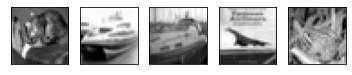

In [21]:
for i in range(5):
    plt.subplot(1,5,i+1)
    disp_image(Xts_rgb[i,:,:])

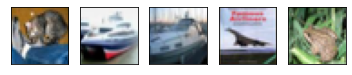

In [22]:
for i in range(5):
    plt.subplot(1,5,i+1)
    disp_image(yts_rgb[i,:,:])

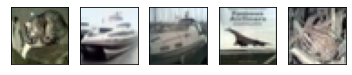

In [23]:
for i in range(5):
    plt.subplot(1,5,i+1)
    disp_image(yhat[i,:,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], <a list of 0 Text major ticklabel objects>)

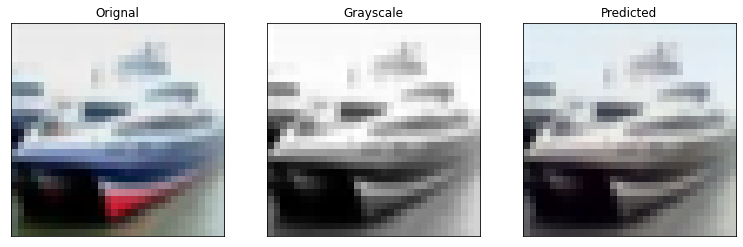

In [24]:
plt.figure(figsize=(13,13))
# Orignal Image
plt.subplot(1,3,1)
plt.imshow(Y_test[1])
plt.title('Orignal')
plt.xticks([])
plt.yticks([])

# Grayscale Image
plt.subplot(1,3,2)
plt.imshow(Xts_rgb[1])
plt.title('Grayscale')
plt.xticks([])
plt.yticks([])

# Predicted Image
plt.subplot(1,3,3)
imshow(yhat[1])
plt.title('Predicted')
plt.xticks([])
plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], <a list of 0 Text major ticklabel objects>)

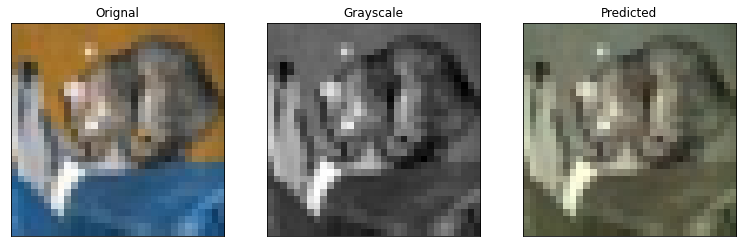

In [25]:
plt.figure(figsize=(13,13))
# Orignal Image
plt.subplot(1,3,1)
plt.imshow(Y_test[0])
plt.title('Orignal')
plt.xticks([])
plt.yticks([])

# Grayscale Image
plt.subplot(1,3,2)
plt.imshow(Xts_rgb[0])
plt.title('Grayscale')
plt.xticks([])
plt.yticks([])

# Predicted Image
plt.subplot(1,3,3)
imshow(yhat[0])
plt.title('Predicted')
plt.xticks([])
plt.yticks([])

## LAB

In [56]:
Y_test.shape

(10000, 32, 32, 3)

In [26]:
lab_image_train = rgb2lab(Y_train)
lab_image_test = rgb2lab(Y_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], <a list of 0 Text major ticklabel objects>)

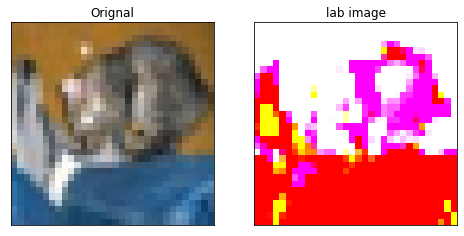

In [27]:
plt.figure(figsize=(8,8))
# Orignal Image
plt.subplot(1,2,1)
plt.imshow(Y_test[0])
plt.title('Orignal')
plt.xticks([])
plt.yticks([])

# lab channel Image
plt.subplot(1,2,2)
plt.imshow(lab_image_test[0])
plt.title('lab image')
plt.xticks([])
plt.yticks([])

In [28]:
lab_train_norm = (lab_image_train + [0, 128, 128]) / [100, 255, 255]
lab_test_norm = (lab_image_test + [0, 128, 128]) / [100, 255, 255]

In [29]:
# The input will be the black and white layer with "l" channel
X_train = lab_train_norm[:,:,:,0]
X_test = lab_test_norm[:,:,:,0]

# The outpts will be the "ab" channels
y_train = lab_train_norm[:,:,:,1:]
y_test = lab_test_norm[:,:,:,1:]

xtr_size = X_train.shape
ytr_size = y_train.shape
xts_size = X_test.shape
yts_size = y_test.shape

print(f'Train Input shape: {xtr_size}')
print(f'Trian Output shape: {ytr_size}')
print(f'Test Input shape: {xts_size}')
print(f'Test Output shape: {yts_size}')

Train Input shape: (50000, 32, 32)
Trian Output shape: (50000, 32, 32, 2)
Test Input shape: (10000, 32, 32)
Test Output shape: (10000, 32, 32, 2)


In [42]:
# Reshape Train Dataset
X_train = X_train.reshape(xtr_size[0], xtr_size[1]* xtr_size[2] )
y_train = y_train.reshape(ytr_size[0], ytr_size[1]* ytr_size[2]* ytr_size[3])

# Reshape Test Dataset
X_test = X_test.reshape(xts_size[0], xts_size[1]* xts_size[2])
y_test = y_test.reshape(yts_size[0], yts_size[1]* yts_size[2]* yts_size[3])

In [43]:
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (50000, 1024)
y_train shape (50000, 2048)
X_test shape (10000, 1024)
y_test shape (10000, 2048)


In [32]:
from sklearn.linear_model import LinearRegression, Ridge
reg = Ridge(alpha=0.001)

In [33]:
%%time
reg.fit(X_train, y_train)

CPU times: user 15.6 s, sys: 364 ms, total: 15.9 s
Wall time: 8.47 s


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
yhat2 = reg.predict(X_test)

In [45]:
from sklearn.metrics import r2_score
rsq = r2_score(y_test, yhat2)
print('Test R^2     = %f' % rsq)

Test R^2     = 0.003054


In [48]:
# Reshaping to original size
X_test = X_test.reshape(xts_size)
print(f"X train size: {X_test.shape}")

yhat2 = yhat2.reshape(yts_size)
print(f"X train size: {yhat2.shape}")

X train size: (10000, 32, 32)
X train size: (10000, 32, 32, 2)


In [54]:
# Combining the l and ab channel and convert to RGB format
cur1 = np.zeros((32, 32, 3))
cur1[:,:,0] = X_test[0][:,:]
cur1[:,:,1:] = yhat2[0]

cur1 = (cur1 * [100, 255, 255]) - [0, 128, 128]
image1 = lab2rgb(cur1)

cur2 = np.zeros((32, 32, 3))
cur2[:,:,0] = X_test[1][:,:]
cur2[:,:,1:] = yhat2[1]

cur2 = (cur2 * [100, 255, 255]) - [0, 128, 128]
image2 = lab2rgb(cur2)

([], <a list of 0 Text major ticklabel objects>)

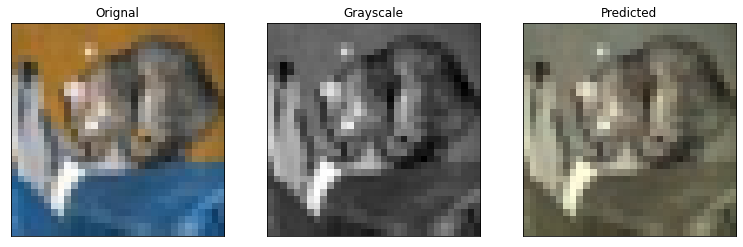

In [51]:
plt.figure(figsize=(13,13))
# Orignal Image
plt.subplot(1,3,1)
plt.imshow(Y_test[0])
plt.title('Orignal')
plt.xticks([])
plt.yticks([])

# Grayscale Image
plt.subplot(1,3,2)
plt.imshow(rgb2gray(Y_test[0]))
plt.title('Grayscale')
plt.xticks([])
plt.yticks([])

# Predicted Image
plt.subplot(1,3,3)
imshow(image1)
plt.title('Predicted')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

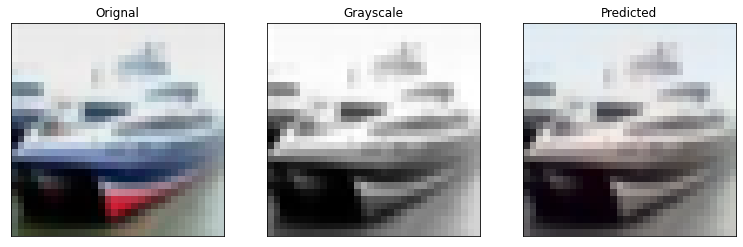

In [55]:
plt.figure(figsize=(13,13))
# Orignal Image
plt.subplot(1,3,1)
plt.imshow(Y_test[1])
plt.title('Orignal')
plt.xticks([])
plt.yticks([])

# Grayscale Image
plt.subplot(1,3,2)
plt.imshow(rgb2gray(Y_test[1]))
plt.title('Grayscale')
plt.xticks([])
plt.yticks([])

# Predicted Image
plt.subplot(1,3,3)
imshow(image2)
plt.title('Predicted')
plt.xticks([])
plt.yticks([])